In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [5]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 39s 39ms/step - loss: 1.8682 - accuracy: 0.5238 - val_loss: 0.5037 - val_accuracy: 0.8637
Epoch 2/15
981/981 [==============================] - 39s 39ms/step - loss: 0.6326 - accuracy: 0.8200 - val_loss: 0.1654 - val_accuracy: 0.9598
Epoch 3/15
981/981 [==============================] - 39s 40ms/step - loss: 0.4256 - accuracy: 0.8795 - val_loss: 0.1499 - val_accuracy: 0.9642
Epoch 4/15
981/981 [==============================] - 39s 39ms/step - loss: 0.3200 - accuracy: 0.9085 - val_loss: 0.0891 - val_accuracy: 0.9774
Epoch 5/15
981/981 [==============================] - 39s 40ms/step - loss: 0.2874 - accuracy: 0.9210 - val_loss: 0.0540 - val_accuracy: 0.9852
Epoch 6/15
981/981 [==============================] - 39s 40ms/step - loss: 0.2629 - accuracy: 0.9259 - val_loss: 0.0845 - val_accuracy: 0.9762
Epoch 7/15
981/981 [==============================] - 39s 40ms/step - loss: 0.2329 - accuracy: 0.9364 - val_loss: 0.0946 - val_accuracy:

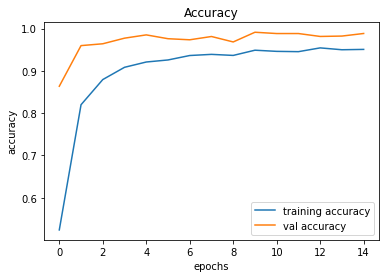

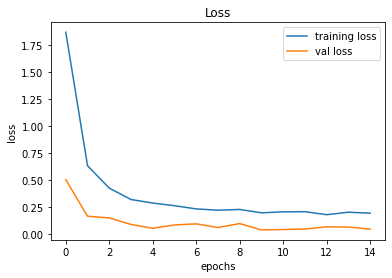

In [8]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print("niceee")

niceee


In [11]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis = -1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9551860649247823
